___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Load Dataset

In [27]:
df= pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Explore Data

You can rename columns to more usable, if you need.

In [28]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [30]:
df.drop(columns=["CustomerID"],axis=1,inplace = True)


In [31]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [32]:
df.nunique()

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

In [33]:
df.Gender.replace("Male",0,inplace=True)
df.Gender.replace("Female",1,inplace=True)

In [34]:
df.Gender.replace("Female",1,inplace=True)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





C:\Users\mkdty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


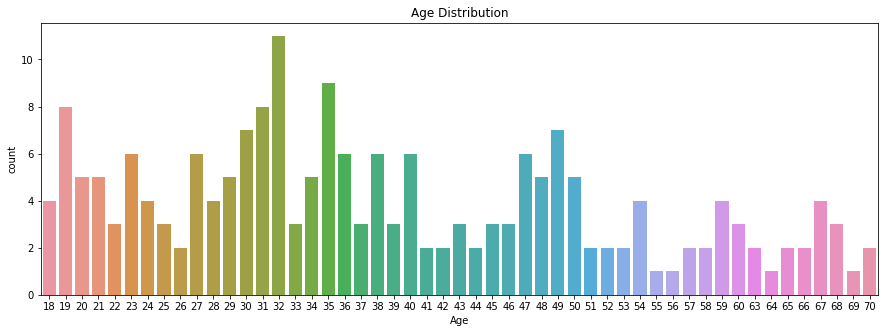

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

C:\Users\mkdty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


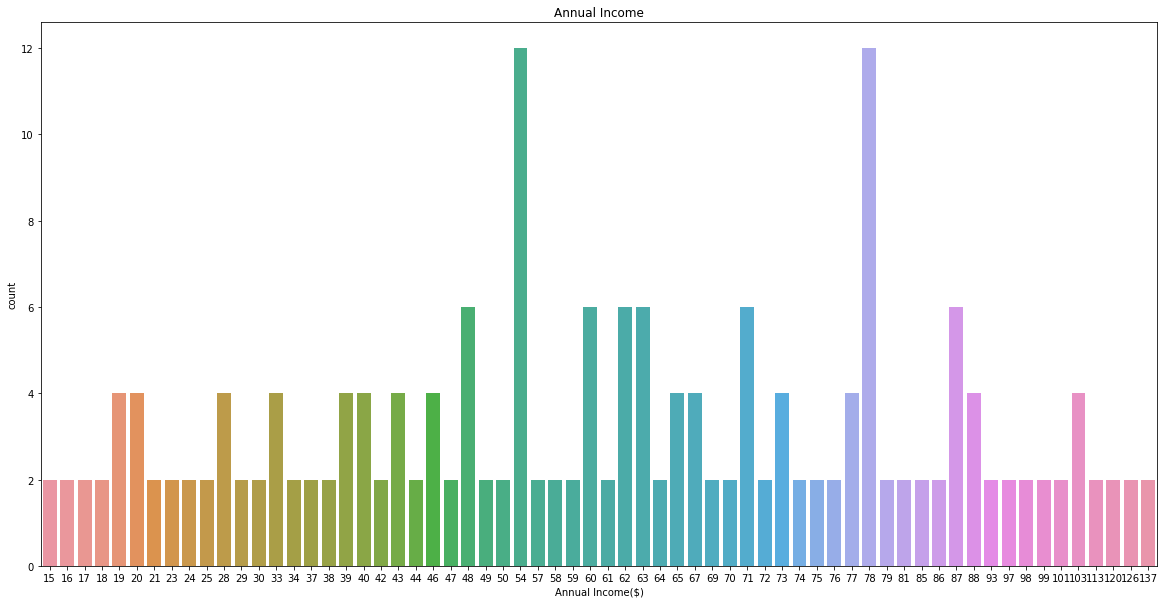

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(df['Annual_Income'])
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
plt.show()

C:\Users\mkdty\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mkdty\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

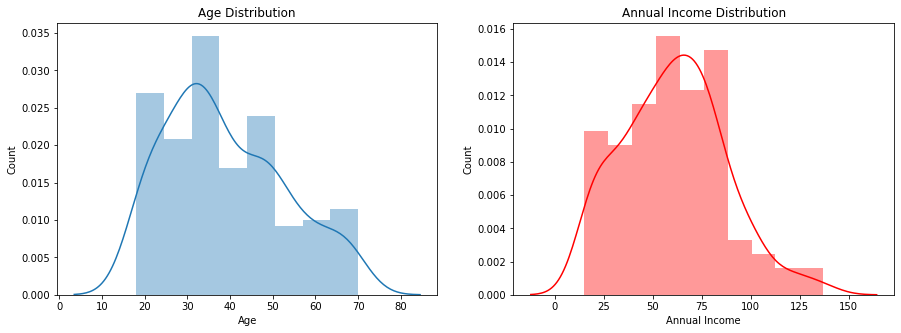

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.subplot(1,2,2)
sns.distplot(df['Annual_Income'],color='red')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

(-1.25, 1.25, -1.25, 1.25)

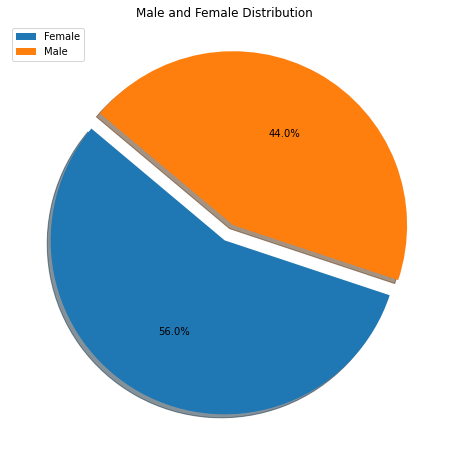

In [38]:
plt.figure(figsize=(8,8))
explode = [0,0.1]
plt.pie(df['Gender'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

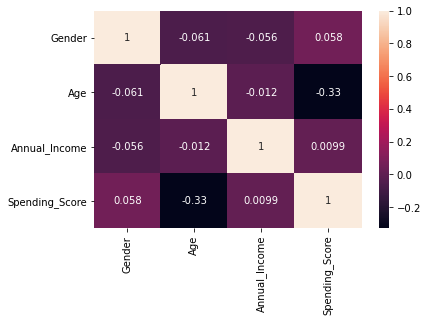

In [39]:
sns.heatmap(df.corr(),annot=True)
plt.show()

C:\Users\mkdty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


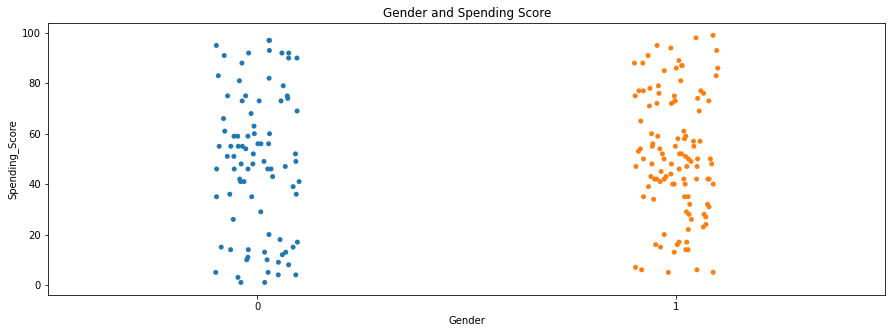

C:\Users\mkdty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


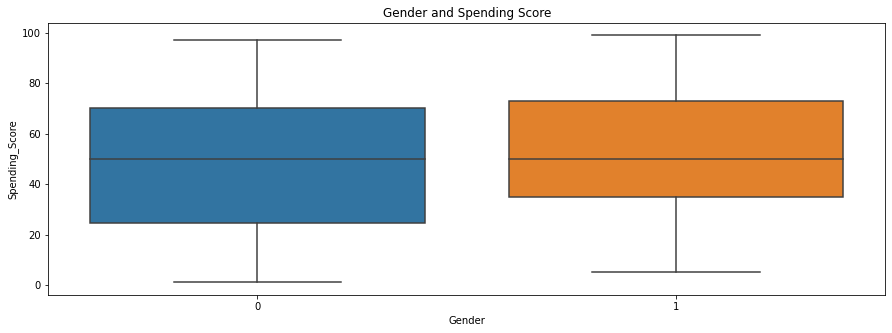

C:\Users\mkdty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


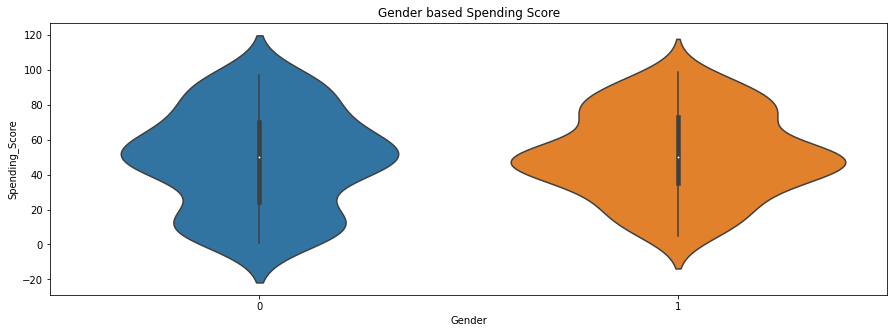

In [40]:
plt.figure(figsize=(15,5))
sns.stripplot(df['Gender'], df['Spending_Score'])
plt.title('Gender and Spending Score')
plt.show()
plt.figure(figsize=(15,5))
sns.boxplot(df['Gender'], df['Spending_Score'])
plt.title('Gender and Spending Score')
plt.show()
plt.figure(figsize=(15,5))
sns.violinplot(df['Gender'],df['Spending_Score'])
plt.title('Gender based Spending Score')
plt.show()

C:\Users\mkdty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


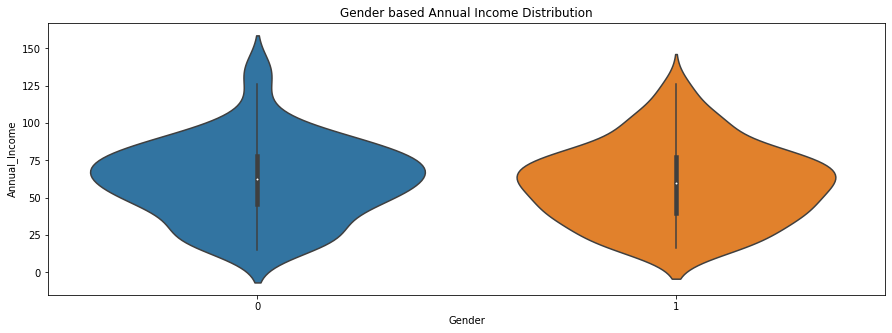

C:\Users\mkdty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


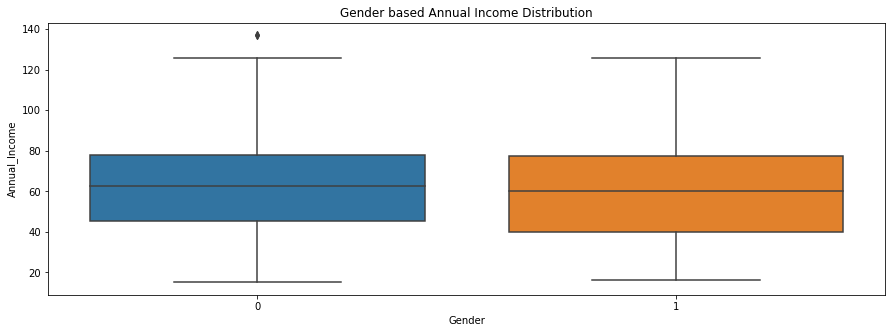

In [41]:
plt.figure(figsize=(15,5))
sns.violinplot(df['Gender'],df['Annual_Income'])
plt.title('Gender based Annual Income Distribution')
plt.show()
plt.figure(figsize=(15,5))
sns.boxplot(df['Gender'],df['Annual_Income'])
plt.title('Gender based Annual Income Distribution')
plt.show()

C:\Users\mkdty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


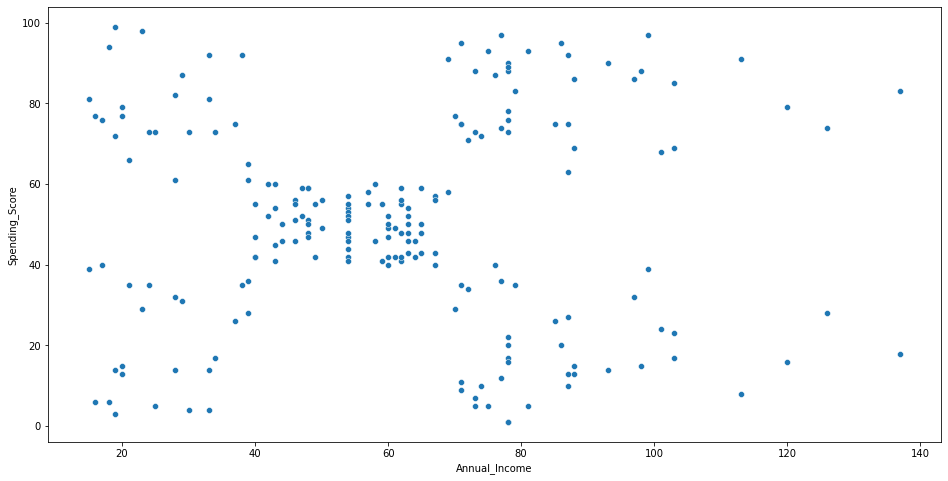

In [42]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(df['Annual_Income'], df['Spending_Score'], ax=ax)
plt.show()

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [43]:
from pyclustertend import hopkins
hopkins(df,df.shape[0])

0.3181851726354189

In [44]:
x1 = df[["Age","Spending_Score"]]

In [45]:
hopkins(x1,x1.shape[0])

0.32056005509416113

#### *ii. Determine optimal number of clusters*

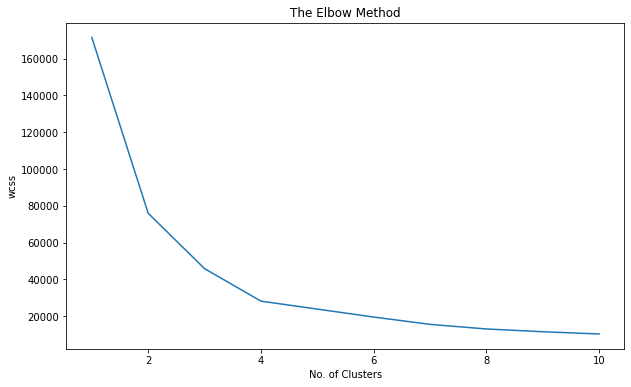

In [46]:
from sklearn.cluster import KMeans
wcss =[]
for n in range(1,11):
    kmeans=KMeans(n_clusters=n,random_state=0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

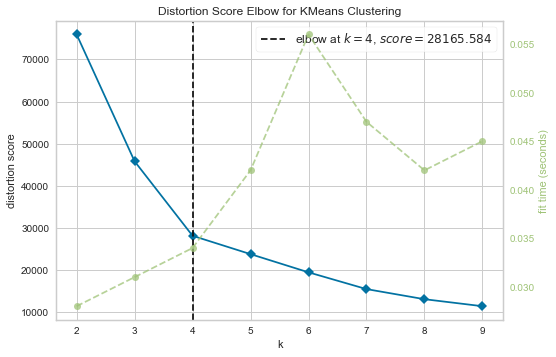

In [47]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x1)
visu.poof()

#### *iii. Apply K Means*

In [52]:
kmeans = KMeans(n_clusters=4)
y_means = kmeans.fit_predict(x1)

In [53]:
x1["cluster"] = y_means

<ipython-input-53-553663510809>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1["cluster"] = y_means


In [54]:
x1

,Age,Spending_Score,cluster
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


#### *iv. Visualizing and Labeling All the Clusters*

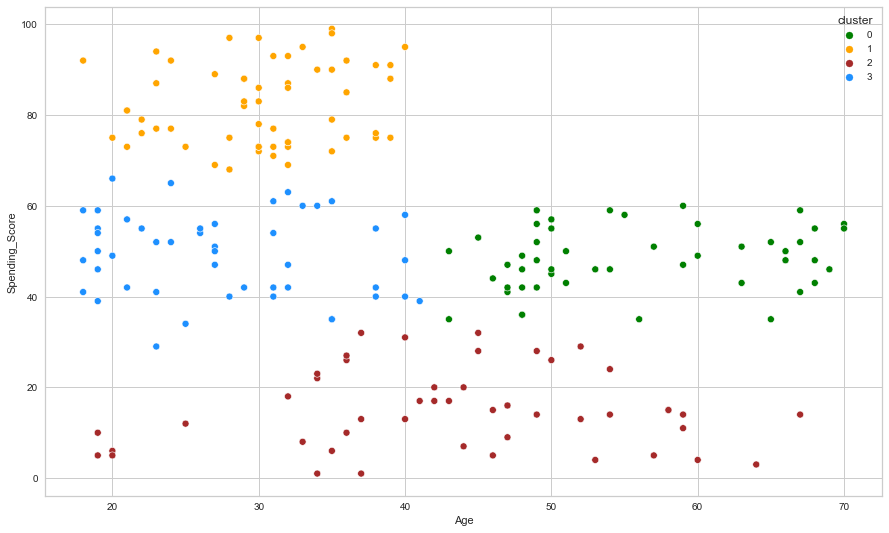

In [55]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster', data=x1,palette=['green','orange','brown','dodgerblue'], legend='full')

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [56]:
x2 = pd.DataFrame(df.loc[:,['Annual_Income','Spending_Score']].values,columns=['Annual_Income','Spending_Score'])


In [58]:
from pyclustertend import hopkins
hopkins(x2,x2.shape[0])

0.30271695888740785

#### *ii. Determine optimal number of clusters*

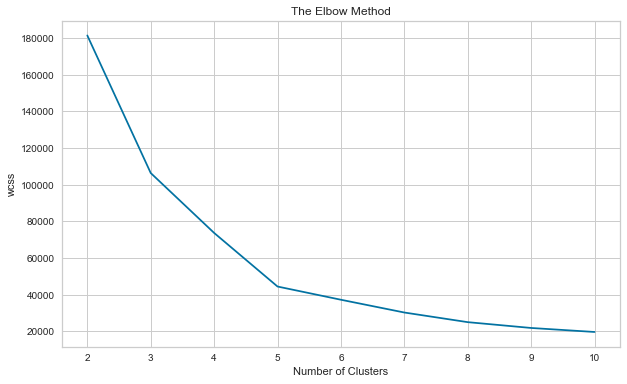

In [60]:
from sklearn.cluster import KMeans
wcss =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

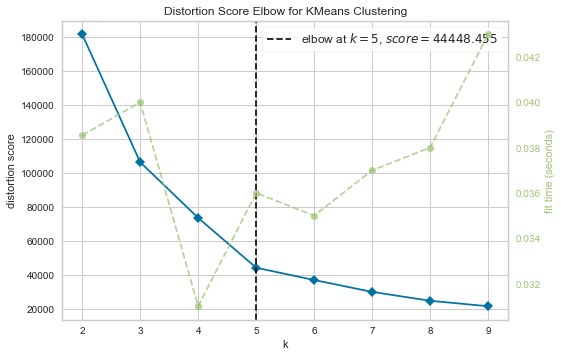

In [61]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x2)
visu.poof()

#### *iii. Apply K Means*

In [62]:
kmeansmodel= KMeans(n_clusters=5)
kmeansmodel.fit(x2)

KMeans(n_clusters=5)

In [64]:
x2["cluster"] = kmeansmodel.labels_
x2

,Annual_Income,Spending_Score,cluster
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3
...,...,...,...
195,120,79,0
196,126,28,2
197,126,74,0
198,137,18,2


#### *iv. Visualizing and Labeling All the Clusters*

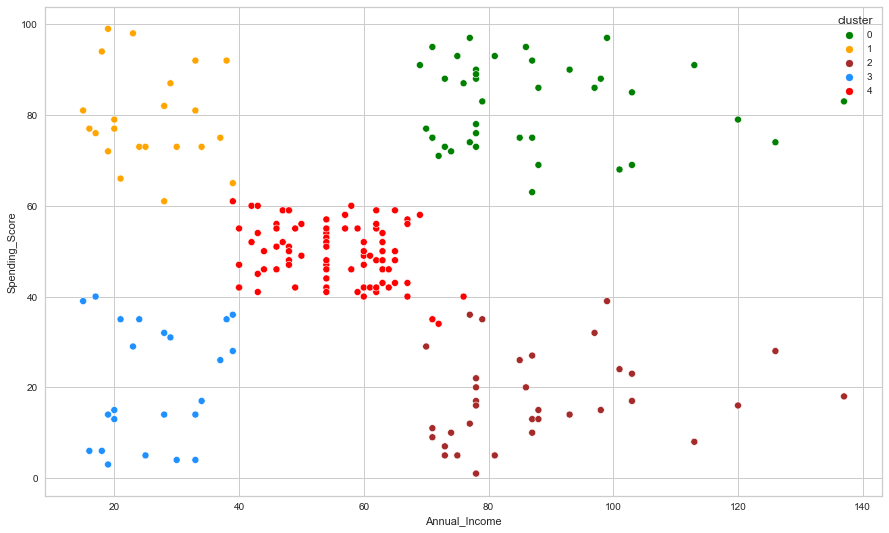

In [65]:
plt.figure(figsize=(15,9))
g=sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster', data=x2,palette=['green','orange','brown','dodgerblue','red'], legend='full')

In [66]:
#The brown group (4th group) has high income and low spending score. That means they can be encouraged to spend more. As a result they are the potential target customers of this dataset. They should be the target of any kind of campaign to increase their spending scores.

### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendogram*

In [67]:
from scipy.cluster.hierarchy import linkage

hc_complete = linkage(x1, "complete")
hc_ward = linkage(x1, "ward")

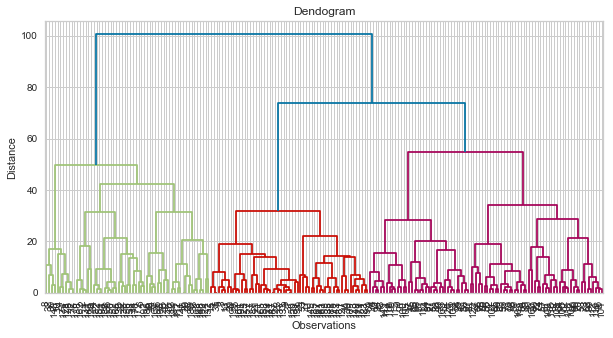

In [68]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete,
          leaf_font_size = 10);

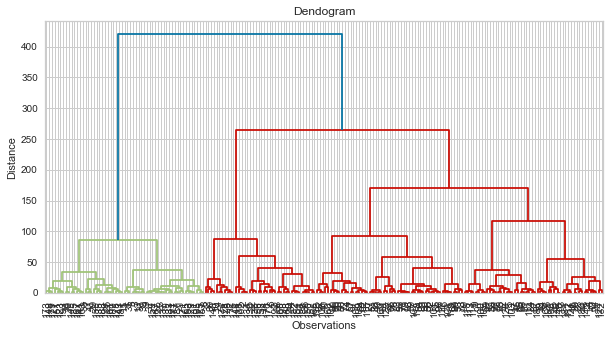

In [69]:
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward,
          leaf_font_size = 10);

**for x2**

In [70]:
hc_complete = linkage(x2, "complete")
hc_ward = linkage(x2, "ward")

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg = cluster.fit_predict(x1)

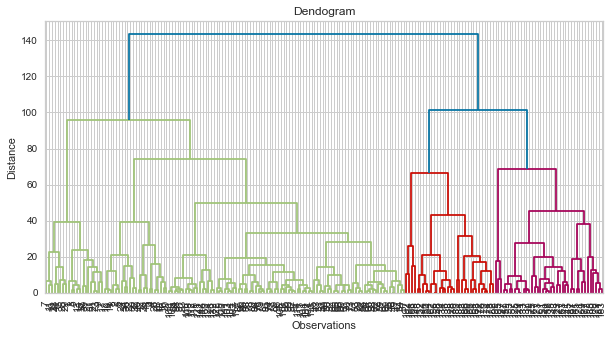

In [71]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete,
          leaf_font_size = 10);

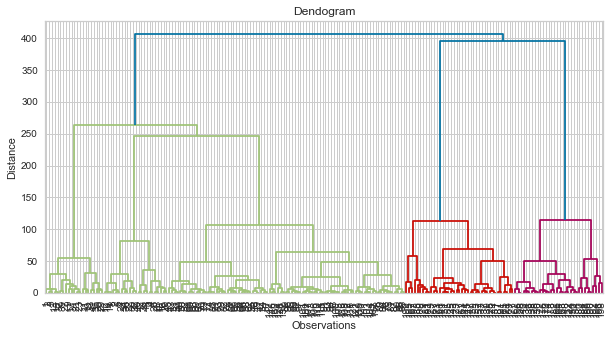

In [72]:
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward,
          leaf_font_size = 10);

#### ii. *Apply Agglomerative Clustering*

In [73]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg = cluster.fit_predict(x1)

In [75]:
x1["cluster2"] = y_agg
x1

,Age,Spending_Score,cluster,cluster2
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0
...,...,...,...,...
195,35,79,1,3
196,45,28,2,0
197,32,74,1,3
198,32,18,2,2


In [79]:

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = cluster.fit_predict(x2)

In [82]:
x2["cluster2"] = y_agg2

#### iii. *Visualizing and Labeling All the Clusters* 

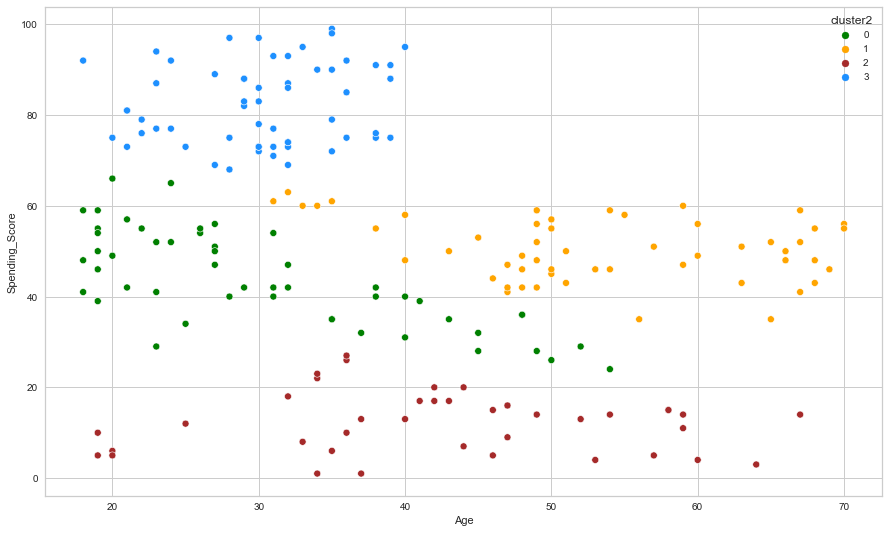

In [76]:

plt.figure(figsize=(15,9))
g=sns.scatterplot(x='Age', y='Spending_Score', hue='cluster2', data=x1,palette=['green','orange','brown','dodgerblue'], legend='full')

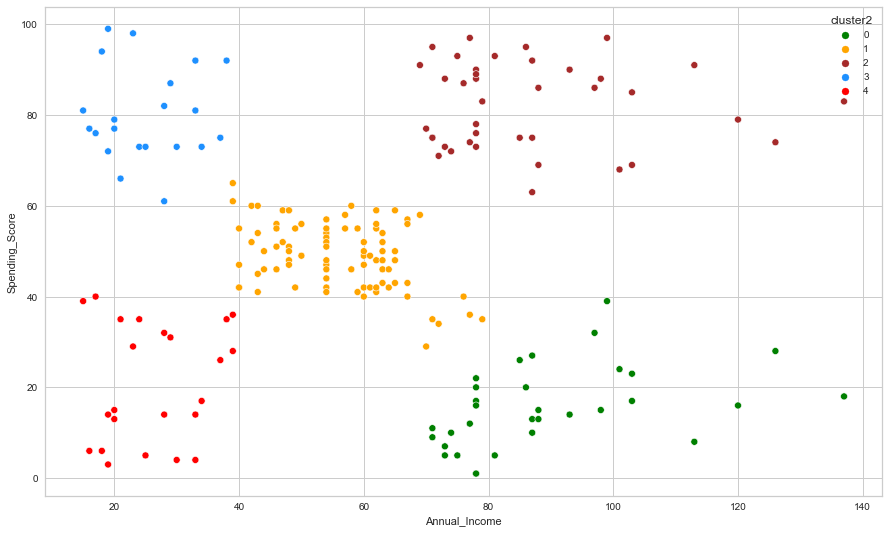

In [83]:
plt.figure(figsize=(15,9))
g=sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster2', data=x2,palette=['green','orange','brown','dodgerblue','red'])

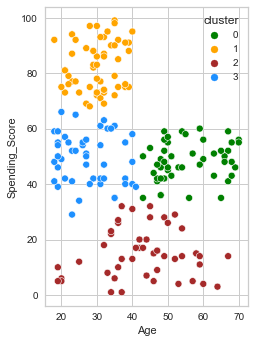

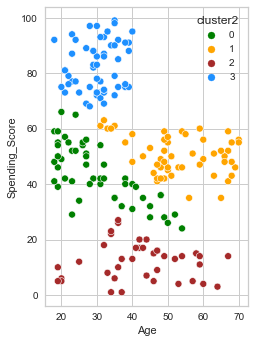

In [84]:
plt.subplot(1,2,1 )
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster', data=x1,palette=['green','orange','brown','dodgerblue'], legend='full')
plt.show()
plt.subplot(1,2,2)
g=sns.scatterplot(x='Age', y='Spending_Score', hue='cluster2', data=x1,palette=['green','orange','brown','dodgerblue'], legend='full')

In [85]:
df["cluster"] = y_agg2

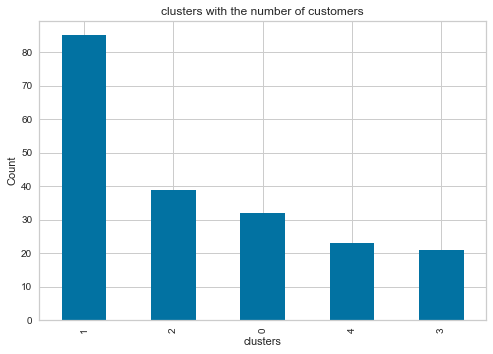

In [86]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
df.cluster.value_counts().plot(kind='bar')

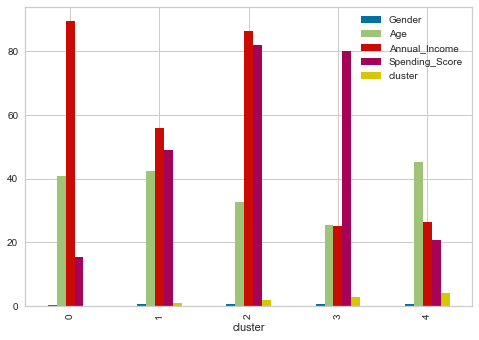

In [87]:
df.groupby(df.cluster).mean().plot(kind='bar')
plt.show()

In [88]:
df.groupby(df.cluster).mean()

,Gender,Age,Annual_Income,Spending_Score
cluster,,,,
0,0.437500,41.000000,89.406250,15.593750
1,0.600000,42.482353,55.811765,49.129412
2,0.538462,32.692308,86.538462,82.128205
3,0.571429,25.333333,25.095238,80.047619
4,0.608696,45.217391,26.304348,20.913043


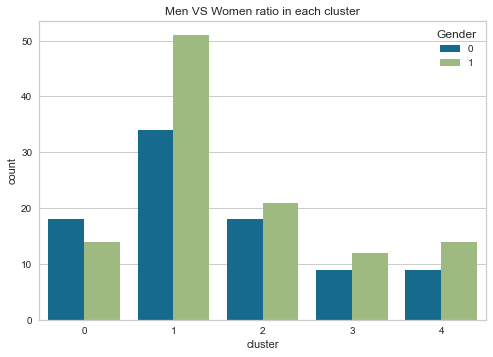

In [90]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
sns.countplot(x=df.cluster, hue=df.Gender)
plt.show()

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___